In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
sp500 = web.DataReader("^GSPC", data_source="yahoo",start="1/1/2000",end=datetime.today().strftime('%d/%m/%Y'))
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5303 entries, 2000-01-03 to 2021-01-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5303 non-null   float64
 1   Low        5303 non-null   float64
 2   Open       5303 non-null   float64
 3   Close      5303 non-null   float64
 4   Volume     5303 non-null   int64  
 5   Adj Close  5303 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 290.0 KB


<AxesSubplot:xlabel='Date'>

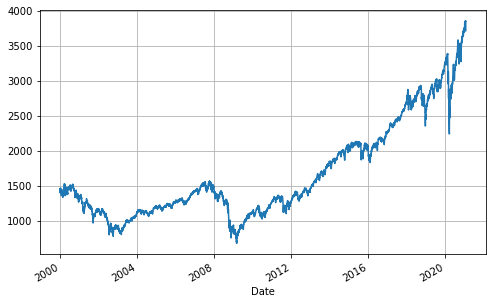

In [2]:
sp500["Close"].plot(grid=True, figsize=(8,5))

In [3]:
sp500["42d"] = np.round(sp500["Close"].rolling(42).mean(), 2)
sp500["252d"] = np.round(sp500["Close"].rolling(252).mean(), 2)

<AxesSubplot:xlabel='Date'>

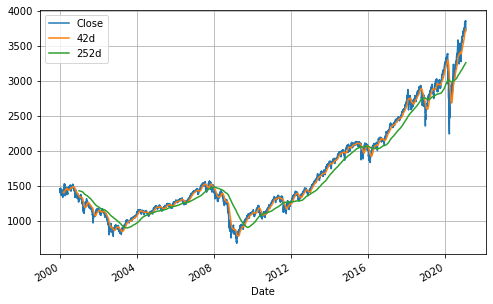

In [4]:
sp500[["Close", "42d", "252d"]].plot(grid=True, figsize=(8,5))

<AxesSubplot:xlabel='Date'>

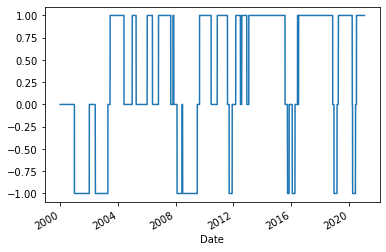

In [5]:
SD = 50
sp500["42-252"] = sp500["42d"] - sp500["252d"]
sp500["Regime"] = np.where(sp500["42-252"] > SD, 1, 0)
sp500["Regime"] = np.where(sp500["42-252"] < -SD, -1, sp500["Regime"])
sp500["Regime"].plot(lw=1.5)

In [6]:
sp500["Market"] = np.log(sp500["Close"] / sp500["Close"].shift(1))
sp500["Strategy"] = sp500["Regime"].shift(1) * sp500["Market"]

<AxesSubplot:xlabel='Date'>

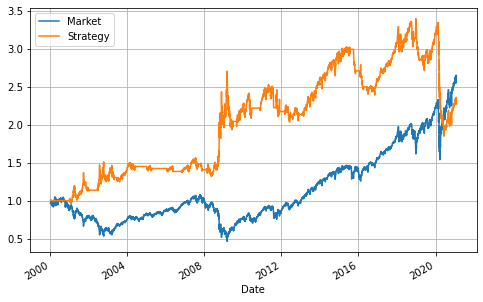

In [7]:
sp500[["Market", "Strategy"]].cumsum().apply(np.exp).plot(grid=True, figsize=(8,5))